In [1]:
# dependencies import
from common_dependencies import *

In [2]:
# paths for files with original data
PATH_TO_DATA = {
    'run_1': 
        ('data/original_data/run_1/run1_WM32_data.csv',
        'data/original_data/run_1/run1_WM32_defects.csv',
        'data/original_data/run_1/run1_WM32_pipe.csv'),
    'run_2':
        ('data/original_data/run_2/run2_WM32_data.csv',
        'data/original_data/run_2/run2_WM32_defects.csv',
        'data/original_data/run_2/run2_WM32_pipe.csv')
}

CROP_SIZE = 16
CROP_STEP = 16

# детерминация случайных величин, отвечающих за выбор первоначальных весов и биасов
tf.compat.v1.set_random_seed(290)
tf.random.set_seed(290)
np.random.seed(290)

In [3]:
x_df, y_df = dw.get_x_and_y_data(*PATH_TO_DATA['run_1'])

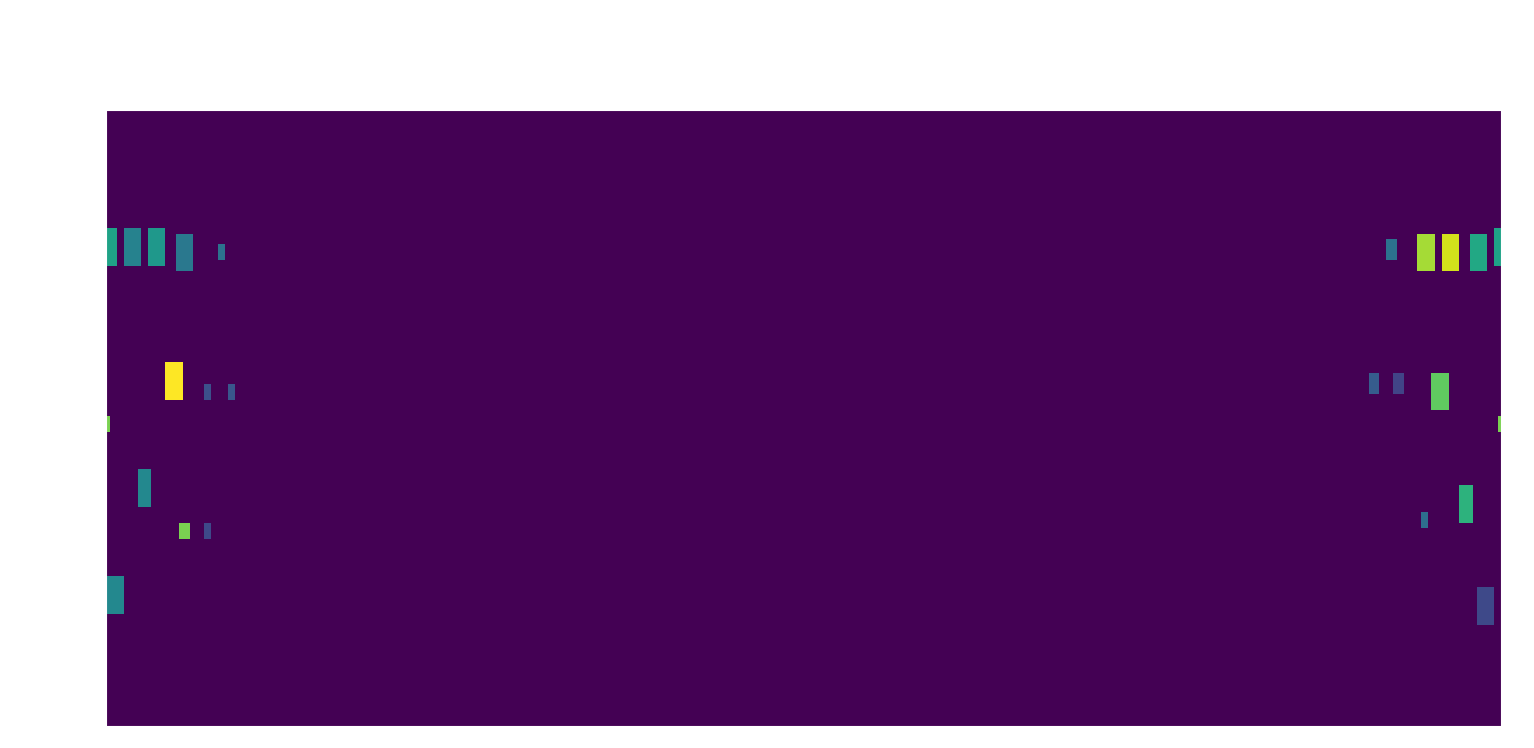

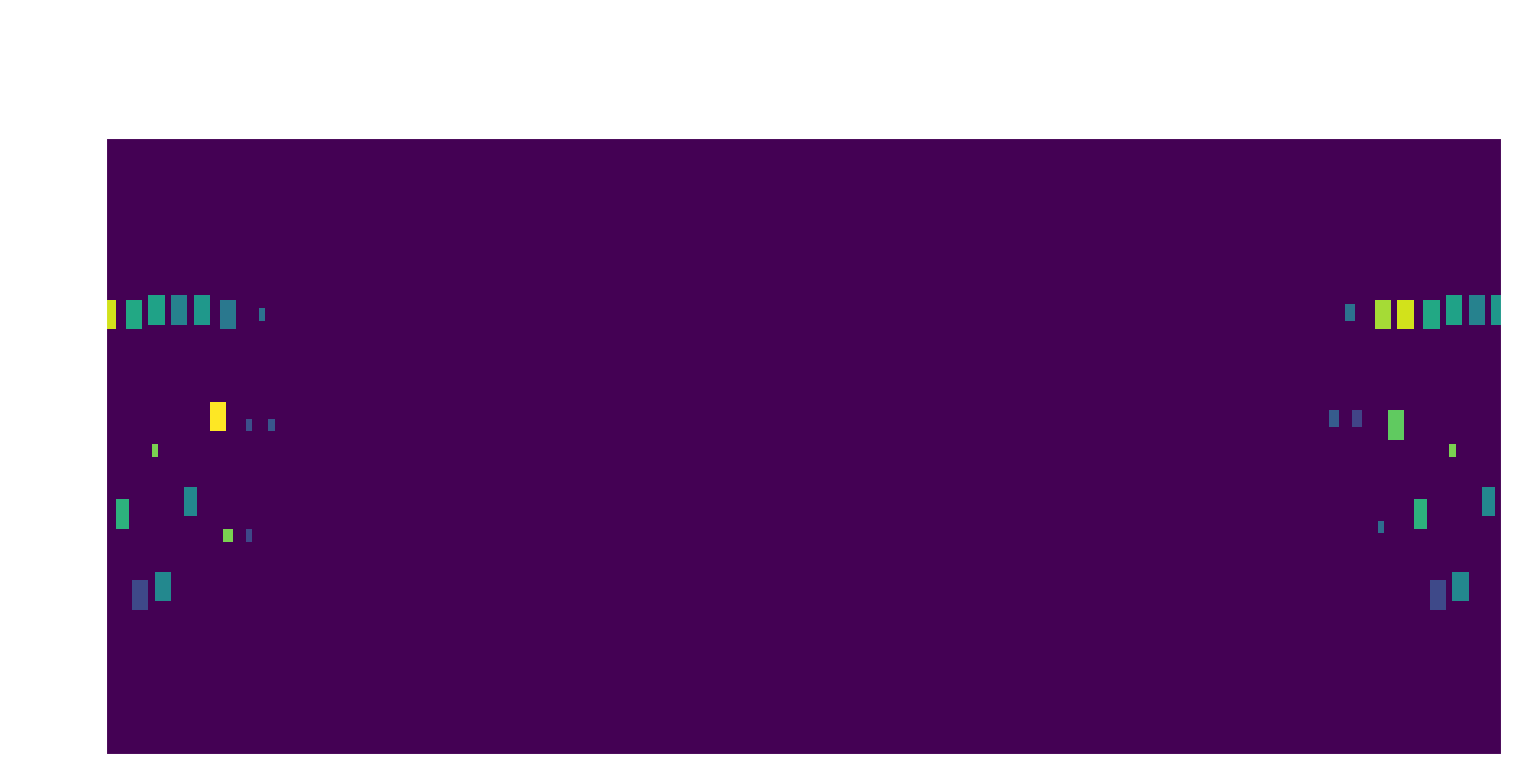

In [4]:
dw.draw_defects_map(y_df, title='Считанная развернутая карта дефектов')
x_df = dw.extend_df_for_prediction(x_df, crop_size=CROP_SIZE, crop_step=CROP_STEP)
y_df = dw.extend_df_for_prediction(y_df, crop_size=CROP_SIZE, crop_step=CROP_STEP)
dw.draw_defects_map(y_df, title='Расширенная развернутая карта дефектов')

In [6]:
# преобразовать данные к виду (измерение, размер х, размер у, каналы)
# для x_data_time каналы = 32
# для x_data_amp каналы = 32
# для y_data каналы = 1
(x_data_time,
x_data_amp) = dw.reshape_x_df_to_image_like_numpy(x_df, CROP_SIZE, CROP_STEP)
y_data = dw.reshape_y_df_to_image_like_numpy(y_df, CROP_SIZE, CROP_STEP)

||||||||||||||||||
X df reshaping to 4D
Original df size:  (145, 430)
Crop windows height/width:  16
Crop windows step across rows and cols:  16
New x_time shape:  (234, 16, 16, 32)
New x_amp shape:  (234, 16, 16, 32)
||||||||||||||||||

||||||||||||||||||
Y df reshaping to 3D
Original df size:  (145, 430)
Crop windows height/width:  16
Crop windows step across rows and cols:  16
New numpy shape:  (234, 16, 16, 1)
||||||||||||||||||



In [7]:
# нормализовать входные данные
x_data_time = dw.standartize_data(x_data_time)
x_data_amp = dw.standartize_data(x_data_amp)

||||||||||||||||||
Data standartizing
arr_max before standartize: 44.5
arr_min before standartize: 0.0
arr_max after standartize: 1.0
arr_min after standartize: 0.0
||||||||||||||||||

||||||||||||||||||
Data standartizing
arr_max before standartize: 62.992
arr_min before standartize: -61.968
arr_max after standartize: 1.0
arr_min after standartize: -0.983743967487935
||||||||||||||||||



In [8]:
# Аугментировать данные
#x_data_time = dp.augment_data(x_data_time) 
#x_data_amp = dp.augment_data(x_data_amp) 
#y_data = dp.augment_data(y_data) 

In [9]:
# создание выходных данных бинарного вида (одномерный массив типа bool)
y_data = dw.create_binary_arr_from_mask_arr(y_data)

||||||||||||||||||
Y binary arr from Y mask arr creation
Y mask arr shape:  (234, 16, 16, 1)
Y binary arr shape:  (234,)
||||||||||||||||||



In [10]:
print(f'{x_data_time.shape=}')
print(f'{x_data_amp.shape=}')
print(f'{y_data.shape=}\n')

x_data_time.shape=(234, 16, 16, 32)
x_data_amp.shape=(234, 16, 16, 32)
y_data.shape=(234,)



In [10]:
# загрузка модели
model = keras.models.load_model('networks/CNN/id=03_in(16x64+16x64)_out(1)_train=0dot0038_test=0dot0.h5')

In [11]:
# тест модели
res = model.evaluate([x_data_time, x_data_amp], y_data, batch_size = 32)

1738/1738 [==============================] - 1521s 872ms/step - loss: 0.0959


In [12]:
print(res)

0.09593156725168228
